<a href="https://colab.research.google.com/github/viviennejuma/w2-core/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_03_Vivienne_Juma_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Financial Inclusion in Kenya, Rwanda, Tanzania, and Uganda

#1. Defining the question

## a) Specifying the Data Analytic Question

> To predict which individuals are most likely to have or use a bank account  in Kenya, Rwanda, Tanzania, and Uganda.

#b) Defining the Metric for Success

> The project will be a success if it is able to predict the individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda while at the same time provide insights into key demographic factors that might drive individuals’ financial outcomes.

# c) Understanding the context

> Access to bank accounts has been regarded as an indicator of financial inclusion. In Africa most adults don't have access to or use a commercial bank account. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. This study seeks to provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda,by predicting which individuals are most likely to have or use a bank account. The study will also provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# d) Experimental design taken

> In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have or use a bank account

# e) Data Relevance

> The data provided is for the year 2016 to 2018 for all the countries in our study, i.e(Kenya, Rwanda, Tanzania, and Uganda) which will enable us come up with trends to depict which group of people are likely to have a bank account. The data also contains important variables such as Gender, Education level, Age, Has a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not.

## 2. Reading the Data

In [1]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/CancerSurvivalDataset
# ---
# Attribute Information:
# 20 - Age of patient at time of operation 
# 64 - Patient's year of operation (year - 1900)
# 1 - Number of positive axillary nodes detected 
# 1 - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()
#Dataset: http://bit.ly/FinancialDataset 

fin = pd.read_csv("http://bit.ly/FinancialDataset")


## 3. Checking the Data

In [2]:
# Determining the no. of records in our dataset
fin.shape

(23524, 13)

In [3]:
# Previewing the top of our dataset
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Previewing the bottom of our dataset
fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# Checking whether each column has an appropriate datatype
fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [6]:
fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [7]:
fin.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.979000,0.899669,2016.0,2016.0,2017.0,2018.0,2056.0
household_size,23496.0,3.681818,2.279933,0.0,2.0,3.0,5.0,21.0
Respondent Age,23490.0,38.804300,16.519996,16.0,26.0,35.0,49.0,100.0


## 5. Tidying the Dataset

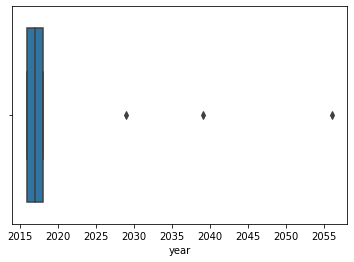

In [8]:
# Checking for Outliers
sns.boxplot(x=fin['year'])

In [9]:
#Removing outliers in the year column
outliers = fin[fin['year'] > 2020].index
fin.drop(outliers , inplace=True)
fin.shape

(23521, 13)

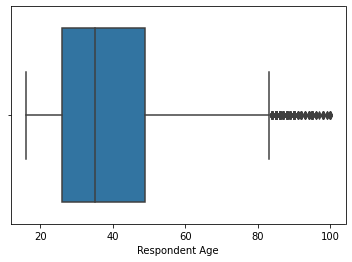

In [10]:
sns.boxplot(x=fin['Respondent Age'])

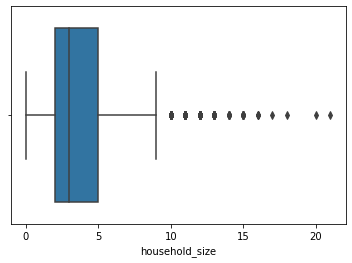

In [11]:
sns.boxplot(x=fin['household_size'])

In [12]:
#checking for anomalies
fin['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [13]:
#Removing the outliers/anomalies using percentile
max_threshold = fin['household_size'].quantile(0.95)
print(max_threshold)
fin2 = fin[fin['household_size']<= max_threshold]
print(fin2.shape)
print(fin2.describe())
print(fin2['household_size'].unique())

8.0
(22760, 13)
               year  household_size  Respondent Age
count  22760.000000    22760.000000    22735.000000
mean    2016.964938        3.475264       38.902661
std        0.842019        1.979997       16.563180
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2018.000000        8.000000      100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [14]:
#Resetting indexes for new dataframe 
fin2.reset_index().head()

,index,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [15]:
fin2.rename(columns={'Has a Bank account':'bank acc',
                          'Type of Location':'residence', 'Respondent Age' : 'age', 'gender_of_respondent':'gender',
                          'Level of Educuation':'education', 'Type of Job': 'job', 'household_size':'family size', 'marital_status':'marital status'}, 
                 inplace=True)
fin2.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['country', 'year', 'uniqueid', 'bank acc', 'residence',
       'Cell Phone Access', 'family size', 'age', 'gender',
       'The relathip with head', 'marital status', 'education', 'job'],
      dtype='object')

In [16]:

fin2 = fin2.drop(['uniqueid', 'Cell Phone Access', 'The relathip with head', ], axis = 1)
print(fin2.columns)

Index(['country', 'year', 'bank acc', 'residence', 'family size', 'age',
       'gender', 'marital status', 'education', 'job'],
      dtype='object')


In [17]:
# Identifying the Missing Data
#
fin2.isnull().sum()

country           14
year               0
bank acc          36
residence         15
family size        0
age               25
gender            29
marital status    27
education         28
job               29
dtype: int64

In [18]:
# Dropping missing values in rows
fin2.dropna(inplace=True)

# Checking for missing values
fin2.isnull().values.any()

False

In [19]:
#Converting datatypes
#convert column year from int64 to datetime
#and residence to category
fin2['country'] = fin2['country'].astype('category')
fin2['bank acc'] = fin2['bank acc'].astype('category')
fin2['residence'] = fin2['residence'].astype('category')
fin2['gender'] = fin2['gender'].astype('category')
fin2['age'] = fin2['age'].astype('int')
fin2['education'] = fin2['education'].astype('category')
fin2['year']= pd.to_datetime(fin2['year']) 
fin2['job'] = fin2['job'].astype('category')
fin2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 23522
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         22610 non-null  category      
 1   year            22610 non-null  datetime64[ns]
 2   bank acc        22610 non-null  category      
 3   residence       22610 non-null  category      
 4   family size     22610 non-null  float64       
 5   age             22610 non-null  int64         
 6   gender          22610 non-null  category      
 7   marital status  22610 non-null  object        
 8   education       22610 non-null  category      
 9   job             22610 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1016.9+ KB


In [20]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23507 non-null  object 
 1   year                    23521 non-null  int64  
 2   uniqueid                23521 non-null  object 
 3   Has a Bank account      23485 non-null  object 
 4   Type of Location        23506 non-null  object 
 5   Cell Phone Access       23510 non-null  object 
 6   household_size          23493 non-null  float64
 7   Respondent Age          23487 non-null  float64
 8   gender_of_respondent    23487 non-null  object 
 9   The relathip with head  23517 non-null  object 
 10  marital_status          23489 non-null  object 
 11  Level of Educuation     23492 non-null  object 
 12  Type of Job             23491 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [21]:
fin2.shape

(22610, 10)

In [22]:
#dropping duplicates
fin2 =fin2.drop_duplicates(inplace=False)
fin2.shape

(16435, 10)

# Univariate analysis

**A) Categorical variables**



In [23]:
fin2.dtypes

country                 category
year              datetime64[ns]
bank acc                category
residence               category
family size              float64
age                        int64
gender                  category
marital status            object
education               category
job                     category
dtype: object

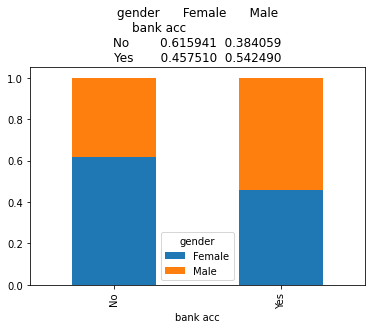

In [24]:
#Which genger is most likely to own a bank account
ax1 = fin2.groupby('bank acc')['gender'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = fin2['bank acc'].value_counts()
#From output, we can conclude 
#the difference between the males and females who own a bank account is 
#significant. The number of Males who own a bank account is significantly more 
#than females.

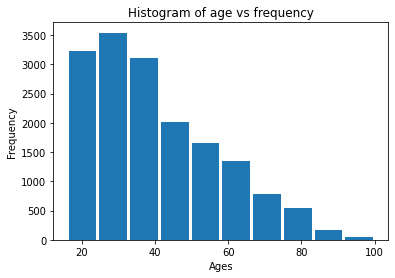

In [25]:
#Plotting a age histogram
age_points = fin2['age']

plt.hist(age_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
#We can conclude that the greater population in the dataset is between the ages
# of 25 and 30.

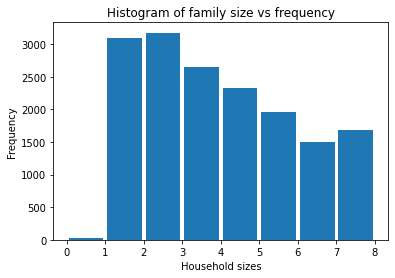

In [26]:
#Plotting a age histogram
size_points = fin2['family size']

plt.hist(size_points, bins=8, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of family size vs frequency')
plt.show()
#We can conclude that the greater population in the dataset has a household size
#of between 2 to 3

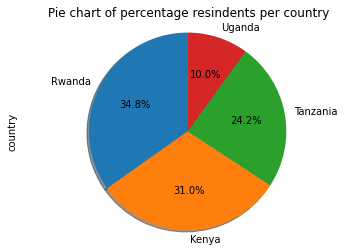

In [27]:
#pie chart for countries
fin2.country.value_counts().plot(kind='pie',autopct='%1.1f%%', shadow = True, startangle = 90 )
plt.axis('equal')
plt.title('Pie chart of percentage resindents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study
#at 34.2% and Uganda the lowest at 10.6%

**Summary**
1.  Greater population in the dataset is between the ages of 25 and 30.
2.  Most respondents have a family size of between 2 and 3
3. Rwanda had the highest number of residents while Uganda had the least
4.the difference between the males and females who own a bank account is significant. The number of Males who own a bank account is significantly more than females.


**B) Numerical variables**

In [28]:
#Numeric-Numeric Variables
#Checking for numeric variables in our data
#isolating numerical datatypes
numerical = fin2.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

family size    float64
age              int64
dtype: object

In [29]:
# Measures of central tendancies and dispersion
fin2.describe().T

,count,mean,std,min,25%,50%,75%,max
family size,16435.0,3.528019,2.028125,0.0,2.0,3.0,5.0,8.0
age,16435.0,40.146152,17.212583,16.0,26.0,36.0,51.0,100.0


In [30]:
# The mode of the year
fin2["year"].mode()

0   1970-01-01 00:00:00.000002018
dtype: datetime64[ns]

In [31]:
# The median of the household size
fin2["family size"].median()

3.0

In [32]:
# Measure of dispersion
# The skewness of Respondent age
fin2["age"].skew()

0.7513186373991934

In [33]:
# Quantiles of the year
fin2["year"].quantile([0.25,0.5,0.75])

0.25   1970-01-01 00:00:00.000002016
0.50   1970-01-01 00:00:00.000002017
0.75   1970-01-01 00:00:00.000002018
Name: year, dtype: datetime64[ns]

# Bivariate analysis

In [34]:
#Calculating correlation
correlation = numerical.dropna().corr()
correlation

,family size,age
family size,1.000000,-0.123987
age,-0.123987,1.000000


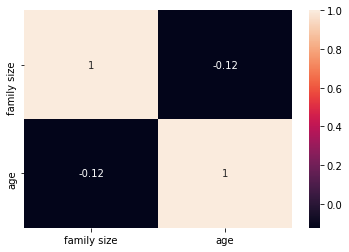

In [35]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
#There is basically no correlation between household size and age of respondents

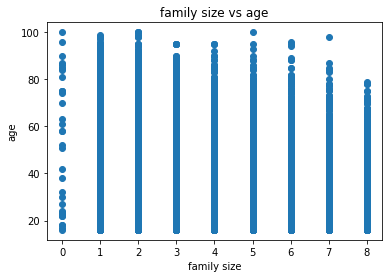

In [36]:
#Plotting scatter plots
plt.scatter(numerical["family size"] , fin2["age"])

# Giving our scatterplot a title
plt.title('family size vs age')

# Labelling our x axis
plt.xlabel('family size')

# Labelling our y axis
plt.ylabel('age')

# We then display our scatterplot as shown below
plt.show()

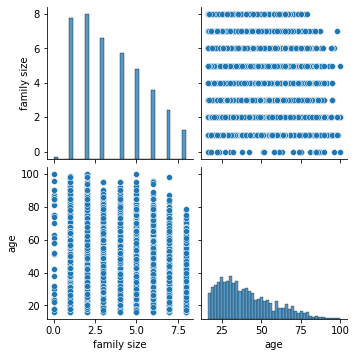

In [37]:
# Ploting the bivariate summaries
sns.pairplot(fin2)
plt.show()

In [38]:
# The summaries of correlation
fin2.corr()
# The correlations are weak and

,family size,age
family size,1.000000,-0.123987
age,-0.123987,1.000000


# Multivariate Analysis- Reduction techniques

# Principal Component Analysis

In [39]:
#Dropping unecessary columns
fin.drop(["country", "year", "uniqueid", "The relathip with head", "marital_status", "Level of Educuation", "Type of Job"],axis=1,inplace=True)

In [40]:
# Dropping null values
fin.dropna(inplace=True)
# Checking for null values
fin.isnull().values.any()

False

In [41]:

# Step two: Converting gender column into integer
gender = {
    'Male': 1,
    'Female': 0
}
fin['gender_of_respondent'] = fin['gender_of_respondent'].map(gender)

In [42]:
# Converting Cell phone access column into integer
Cell = {"Yes": 1, "No": 1}
fin["Cell Phone Access"] = fin["Cell Phone Access"].map(Cell)

In [43]:



# Converting gender column into integer
Location = {"Rural": 1, "Urban": 1}
fin["Type of Location"] = fin["Type of Location"].map(Location)

In [44]:
# Dropping null values
fin.dropna(inplace=True)
# Checking for null values
fin.isnull().values.any()


False

In [45]:
# Preview of data
fin.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,Yes,1,1,3.0,24.0,0
1,No,1,1,5.0,70.0,0
2,Yes,1,1,5.0,26.0,1
3,No,1,1,5.0,34.0,0
4,No,1,1,8.0,26.0,1


*Preprocessing*

In [46]:
 X = fin.drop('Has a Bank account', 1)
y = fin['Has a Bank account']

In [47]:
# Step four:Splitting into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Step five:Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# Step six: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [50]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.73495149e-01, 3.34076671e-01, 2.92428180e-01, 4.32739007e-34,
       0.00000000e+00])

In [51]:
# Step seven: Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [52]:
# Step eight: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [53]:
# Step nine: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4039    0]
 [ 641    0]]
Accuracy 0.8630341880341881


In [54]:
# Step Ten: Results with 2 Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=0.5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4039    0]
 [ 641    0]]
Accuracy 0.8630341880341881


Our accuracy is 86% on the first PCA. The accuracy does not improve with increased PCA, hence we should stick to the first PCA.



# Linear discriminant analysis

In [57]:
# Preview of data
fin.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,Yes,1,1,3.0,24.0,0
1,No,1,1,5.0,70.0,0
2,Yes,1,1,5.0,26.0,1
3,No,1,1,5.0,34.0,0
4,No,1,1,8.0,26.0,1


In [58]:
X = fin.drop('Has a Bank account', 1)
y = fin['Has a Bank account']

In [59]:
# divide data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [61]:
# Step 7: Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [62]:
# Evaluate performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4039    0]
 [ 641    0]]
Accuracy0.8630341880341881


*PCA and LDA both show the same accuracy of 86%*

##  Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

*   yes




### b). Do we need other data to answer our question?
* The data answered our research question
* It would be good to find a dataset where the independent variables have a positive correlation with the dependent variable

### c). Did we have the right question?

* yes